In [1]:
##QUESTIONS TO ANSWER  
##1.) What was the change in price of the stock over time?
##2.) What was the daily return of the stock on average?
##3.) What was the moving average of the various stocks?
##4.) What was the correlation between different stocks' closing prices?
##5.) What was the correlation between different stocks' daily returns?


In [2]:
        ##Standard Imports
import pandas as pd
import numpy as np
from datetime import date
from pandas import Series, DataFrame as df
import pandas_datareader as pdr ###importing python data reader
from pandas_datareader import data
from pandas_datareader import DataReader
import yfinance as yf
import scipy.stats as stats  ###we use this to annotate value of on graph

        ##Plots
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

import yfinance as yf


In [3]:
#Using APLE, GOOGLE, MICROSOFT AND AMAZON
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# Set up End and Start times for data grab
end = date.today()
start = date(end.year - 1,end.month,end.day)

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = yf.download(stock, start=start, end=end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-11-13 to 2021-11-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


<AxesSubplot:xlabel='Date'>

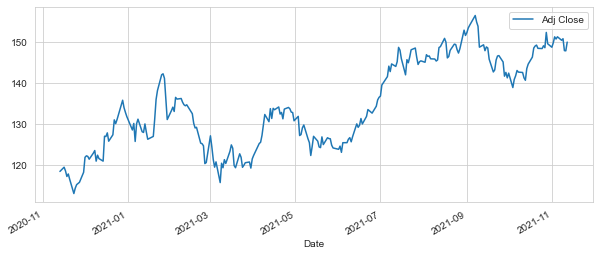

In [5]:
#historical view of the closing price
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

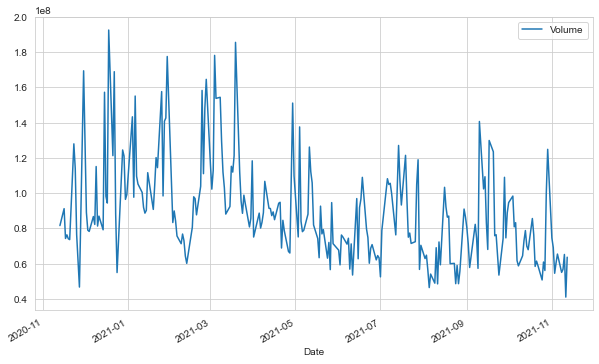

In [6]:
# The total volume of stock being traded each day over the past 1 years
AAPL['Volume'].plot(legend=True,figsize=(10,6))
##we can see that the highest stock in the 1 year period is in the month of December 2020

In [7]:
  AAPL

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-11-13,119.440002,119.669998,117.870003,119.260002,118.529297,81581900
2020-11-16,118.919998,120.989998,118.150002,120.300003,119.562920,91183000
2020-11-17,119.550003,120.669998,118.959999,119.389999,118.658485,74271000
2020-11-18,118.610001,119.820000,118.000000,118.029999,117.306824,76322100
2020-11-19,117.589996,119.059998,116.809998,118.639999,117.913086,74113000
...,...,...,...,...,...,...
2021-11-08,151.410004,151.570007,150.160004,150.440002,150.440002,55020900
2021-11-09,150.199997,151.429993,150.059998,150.809998,150.809998,56787900
2021-11-10,150.020004,150.130005,147.850006,147.919998,147.919998,65187100


In [8]:
# Let's go ahead and plot out several moving averages
ma_day = [5,10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = df(AAPL['Adj Close'].rolling(ma).mean())
    

<AxesSubplot:xlabel='Date'>

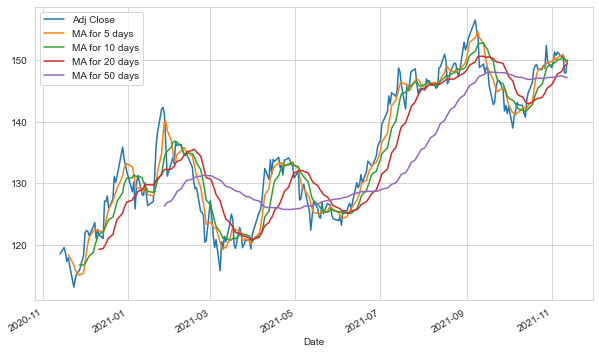

In [9]:
AAPL[['Adj Close','MA for 5 days','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,6))

##the plot shows us the rolling avereage and we can see that the larger the dates the smoother and less precise the lines abecome....




<AxesSubplot:xlabel='Date'>

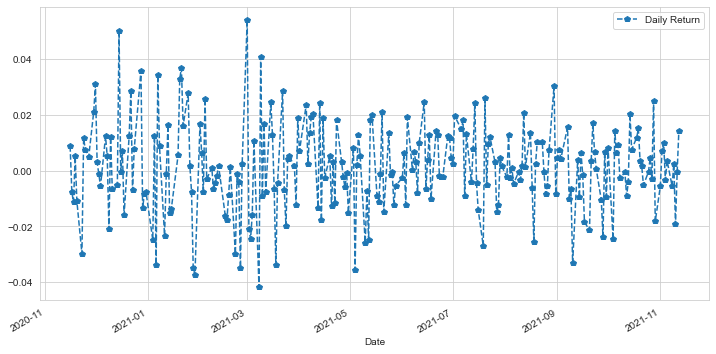

In [10]:

# We'll use pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
AAPL['Daily Return'].plot(figsize=(12,6),legend=True,linestyle='--',marker='p')


/Users/mayorbaba/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

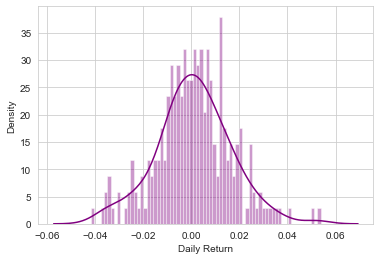

In [11]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=70,color='purple')

# Could have also done:
#AAPL['Daily Return'].hist()

In [12]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df =  yf.download(['AAPL','GOOG','MSFT','AMZN'],start,end)['Adj Close']


[*********************100%***********************]  4 of 4 completed


In [13]:
df(closing_df)

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2020-11-13,118.529297,3128.810059,1777.020020,214.541367
2020-11-16,119.562920,3131.060059,1781.380005,215.254807
2020-11-17,118.658493,3135.659912,1770.150024,212.510010
2020-11-18,117.306831,3105.459961,1746.780029,209.708328
2020-11-19,117.913094,3117.020020,1763.920044,211.039627
...,...,...,...,...
2021-11-08,150.440002,3488.979980,2987.030029,336.989990
2021-11-09,150.809998,3576.229980,2984.969971,335.950012
2021-11-10,147.919998,3482.050049,2932.520020,330.799988


In [14]:
## getting the closing stocks ##
tech_rets= closing_df.pct_change()

In [15]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2020-11-13,NaN,NaN,NaN,NaN
2020-11-16,0.008720,0.000719,0.002454,0.003325
2020-11-17,-0.007564,0.001469,-0.006304,-0.012751
2020-11-18,-0.011391,-0.009631,-0.013202,-0.013184
2020-11-19,0.005168,0.003722,0.009812,0.006348


/Users/mayorbaba/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


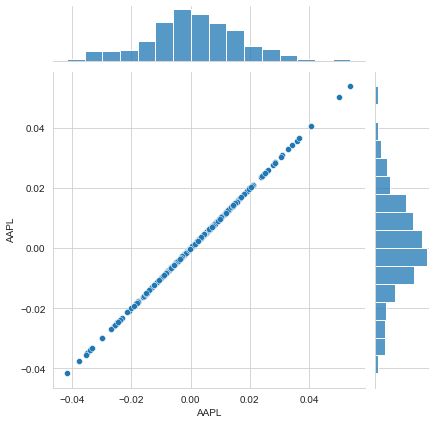

In [16]:
###let'S compare same stock to comfirm if the data is correct##
sns.jointplot ('AAPL','AAPL',tech_rets, kind='scatter')

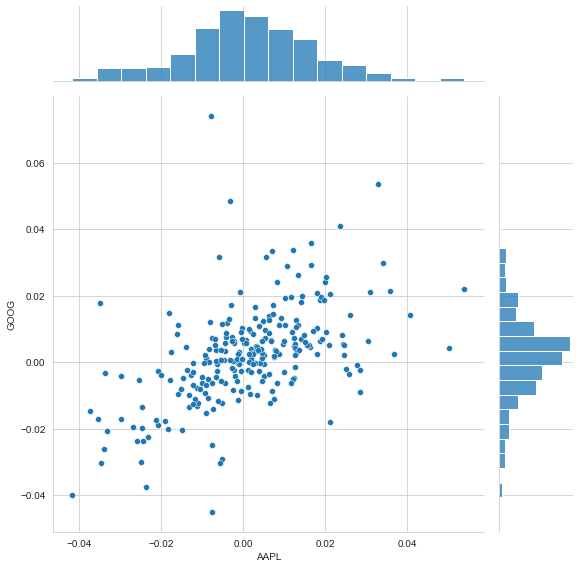

In [17]:
###let'S compare same stock to comfirm if the data is correct##
from scipy import stats
sns.jointplot (x='AAPL',y='GOOG',data=tech_rets, kind='scatter', height=8)

##data show poor correlation


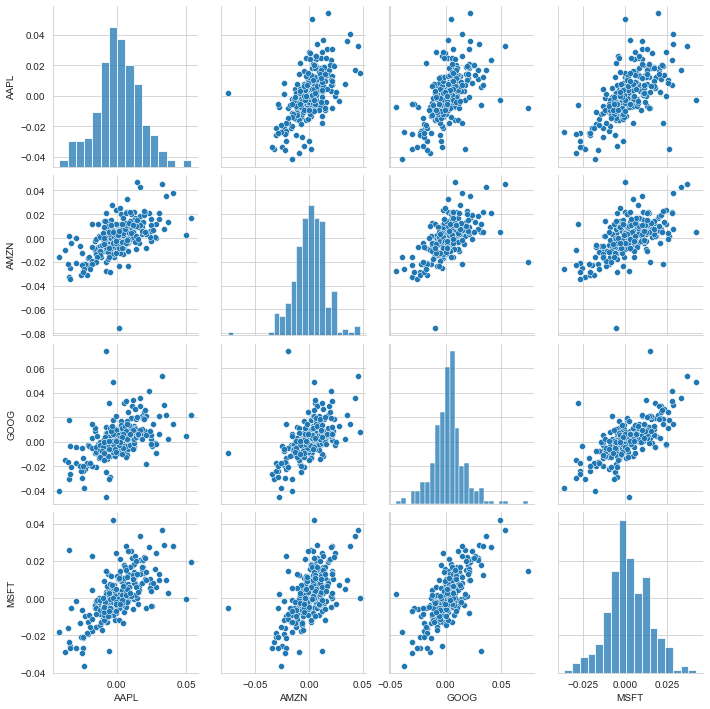

In [18]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_rets.dropna())

/Users/mayorbaba/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mayorbaba/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mayorbaba/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

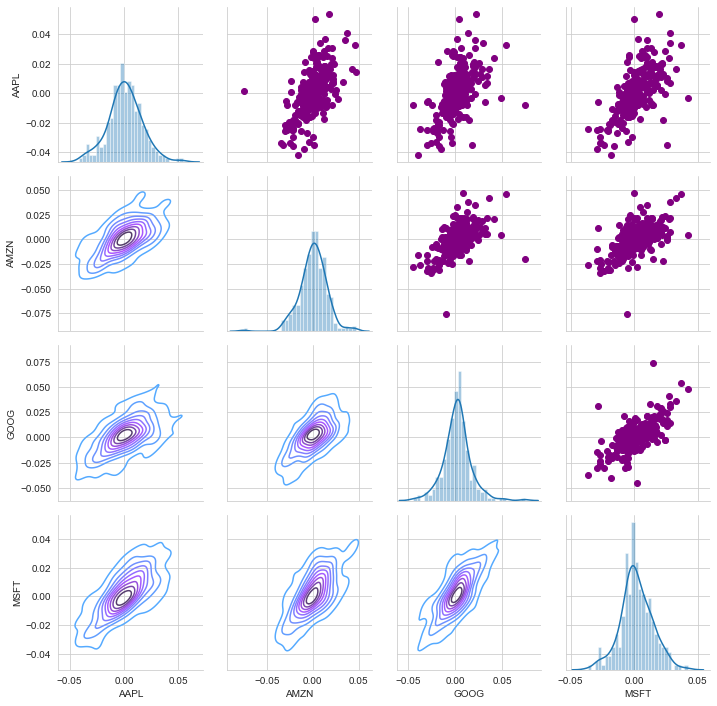

In [19]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(sns.distplot,bins=30)

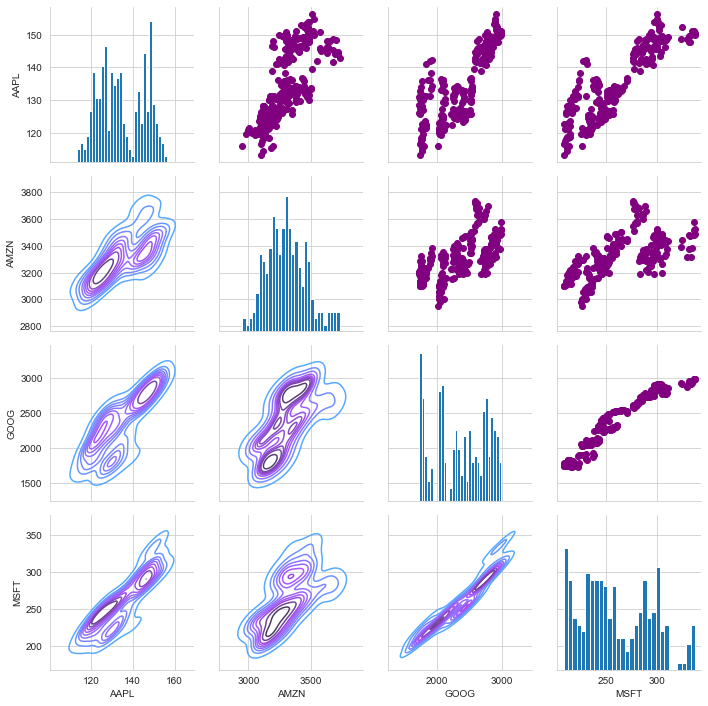

In [20]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

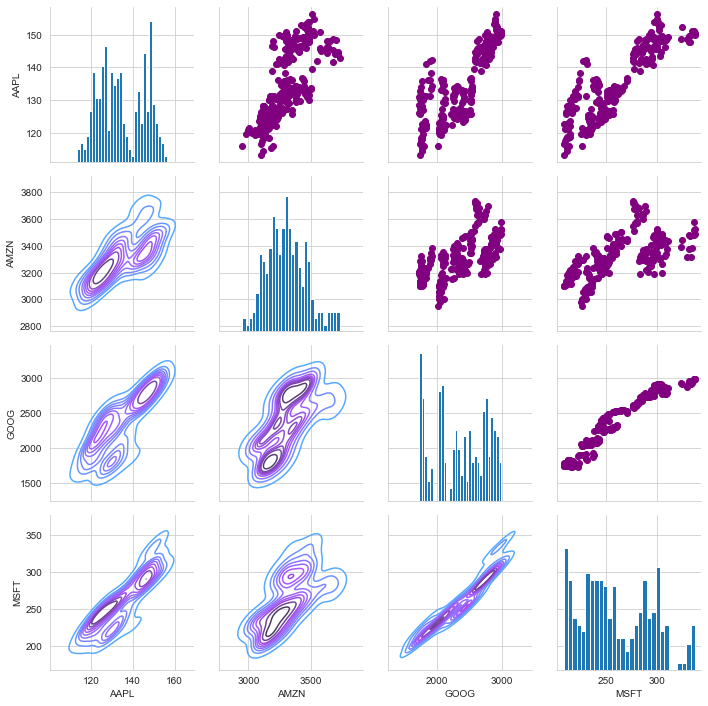

In [21]:
# Set up our figure for closing prices
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the closing price
returns_fig.map_diag(plt.hist,bins=30)